DATA CLEANING, PREPROCESSING AND VISUALISATION

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("insurance_data_final.csv") # load dataset
df.head() # top 5 rows

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [4]:
df.shape # rows and columns
df.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [5]:
df.isnull().sum() # finding sum of missing values
df.duplicated().sum() # finding sum of duplicate values

np.int64(0)

FEATURE ENGINNERING

In [6]:
# Define columns for encoding
one_hot_cols = ['Marital_Status', 'Policy_Type', 'Source_of_Lead', 'Region']

In [7]:
# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Drop first category to avoid dummy variable trap
encoded_ohe = one_hot_encoder.fit_transform(df[one_hot_cols])

In [8]:
# Convert encoded data into DataFrame
encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# Drop original categorical columns
df_encoded = df.drop(columns=one_hot_cols).reset_index(drop=True)

# Merge encoded features with the dataset
df_encoded = pd.concat([df_encoded, encoded_ohe_df], axis=1)

In [9]:
df_encoded.head()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Adjustment,Premium_Amount,...,Marital_Status_Single,Marital_Status_Widowed,Policy_Type_Full Coverage,Policy_Type_Liability-Only,Source_of_Lead_Agent,Source_of_Lead_Online,Source_of_Lead_Referral,Region_Rural,Region_Suburban,Region_Urban
0,47,0,86,1-5 years,50,0,Low,0,0,2286,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,0,86,1-5 years,50,0,Low,0,0,2336,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,49,0,86,1-5 years,50,1,Low,50,0,2386,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,62,1,86,>5 years,0,1,Low,50,0,2336,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36,0,0,>5 years,0,2,Low,100,0,2350,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Columns to encode
label_cols = ['Prior_Insurance', 'Claims_Severity']

# Define custom encoding order
encoding_order = {
    'Prior_Insurance': {'<1 year': 0, '1-5 years': 1, '>5 years': 2},
    'Claims_Severity': {'Low': 0, 'Medium': 1, 'High': 2}
}


In [22]:
df_encoded[label_cols] = df_encoded[label_cols].apply(
    lambda col: col.map(encoding_order.get(col.name, {})).fillna(-1)
)

In [ ]:
df_encoded.to_csv("insurance_data_encoded_final.csv", index=False)


In [24]:
### 3. Summary Statistics ###
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                 Age     Is_Senior  Married_Premium_Discount  \
count  10000.000000  10000.000000              10000.000000   
mean      39.991700      0.159300                 42.131400   
std       14.050358      0.365974                 42.993376   
min       18.000000      0.000000                  0.000000   
25%       29.000000      0.000000                  0.000000   
50%       39.000000      0.000000                  0.000000   
75%       50.000000      0.000000                 86.000000   
max       90.000000      1.000000                 86.000000   

       Prior_Insurance_Premium_Adjustment  Claims_Frequency  \
count                        10000.000000      10000.000000   
mean                            47.625000          0.497200   
std                             34.354438          0.716131   
min                              0.000000          0.000000   
25%                              0.000000          0.000000   
50%                             

EXPLORATORY DATA ANALYSIS

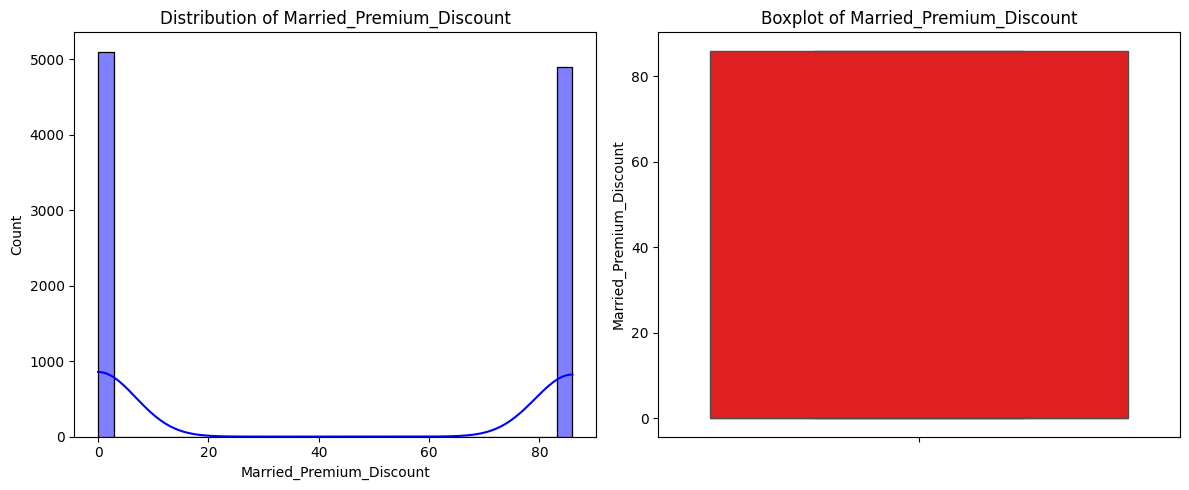

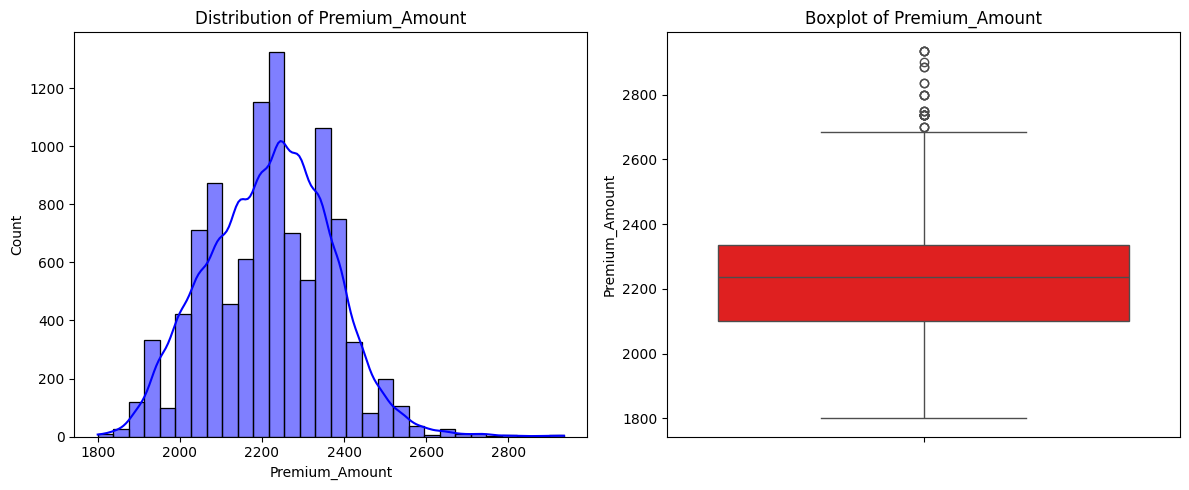

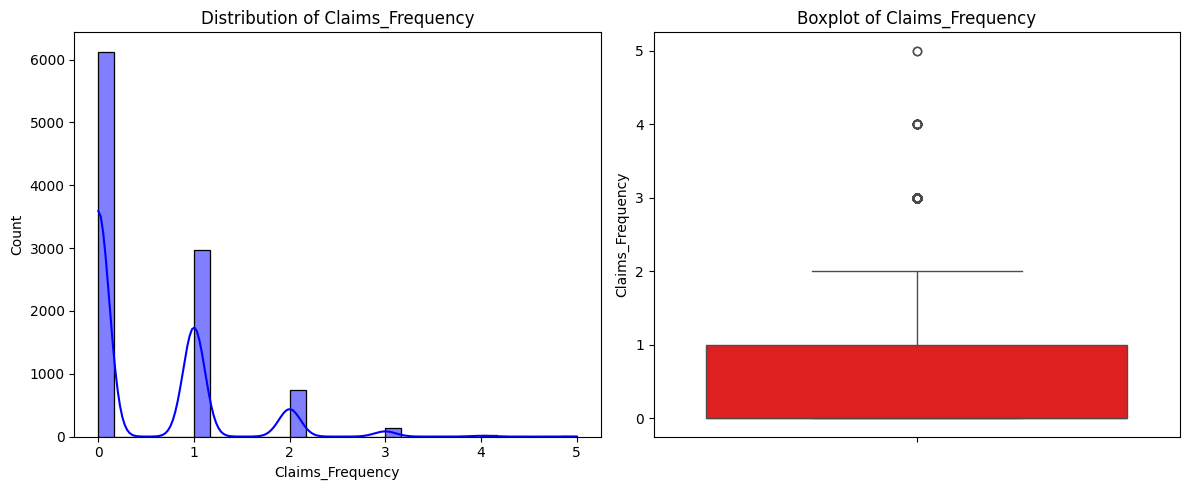

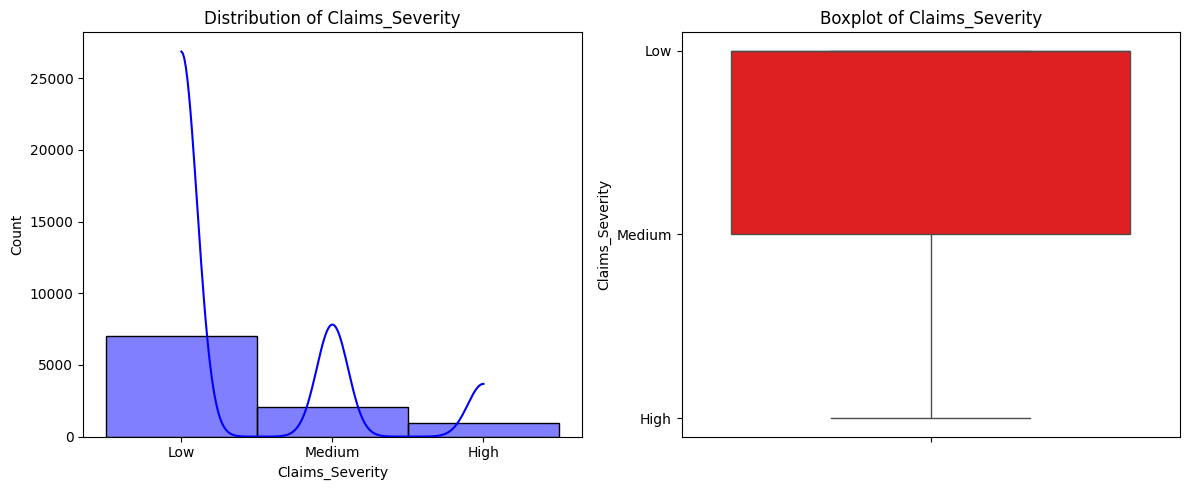

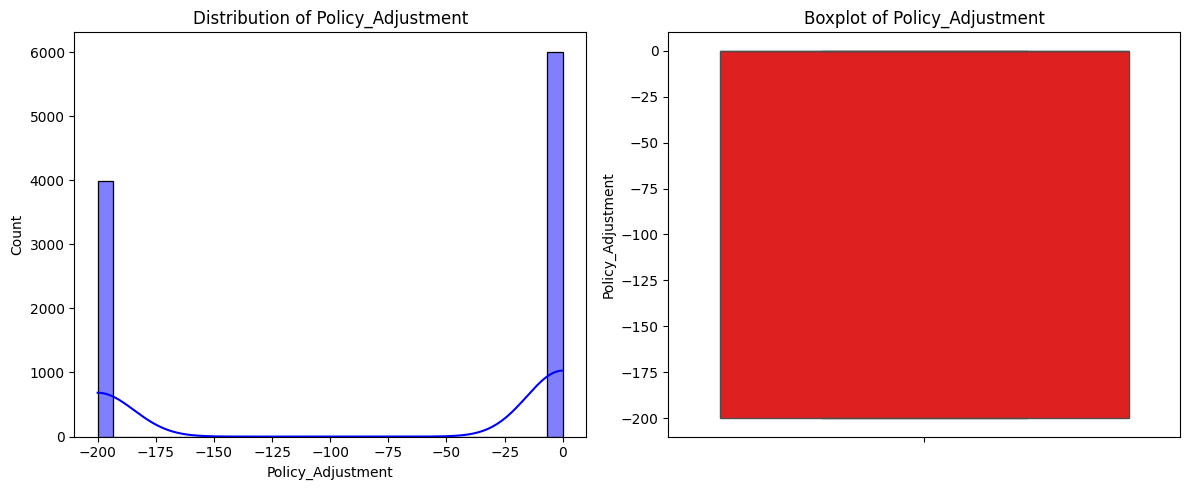

In [25]:
# List of features to analyze
features_to_check = [
    'Married_Premium_Discount', 
    'Premium_Amount', 
    'Claims_Frequency', 
    'Claims_Severity', 
    'Policy_Adjustment'
]

# Plot histograms and boxplots for each feature
for feature in features_to_check:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature].dropna(), color='red')
    plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()
    
   

In [26]:
# Winsorization to cap extreme values (adjust limits if necessary)
df['Married_Premium_Discount'] = winsorize(df['Married_Premium_Discount'], limits=[0.05, 0.05])
df['Premium_Amount'] = winsorize(df['Premium_Amount'], limits=[0.05, 0.05])
df['Claims_Frequency'] = winsorize(df['Claims_Frequency'], limits=[0.05, 0.05])
df['Claims_Severity'] = winsorize(df['Claims_Severity'], limits=[0.05, 0.05])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:729: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


In [28]:
# Log transformation for skewed variables (add 1 to avoid log(0))
df_encoded['Premium_Amount'] = np.log1p(df_encoded['Premium_Amount'])
df_encoded['Claims_Frequency'] = np.log1p(df_encoded['Claims_Frequency'])
df_encoded['Claims_Severity'] = np.log1p(df_encoded['Claims_Severity'])

In [29]:
print(df['Married_Premium_Discount'].unique())
print(df['Policy_Adjustment'].unique())

df_encoded['Married_Premium_Discount'] = (df_encoded['Married_Premium_Discount'] == 86).astype(int)
df_encoded['Policy_Adjustment'] = (df_encoded['Policy_Adjustment'] == -200).astype(int)

[86  0]
[   0 -200]


In [30]:
print(df_encoded.head())  # Shows first 5 rows


   Age  Is_Senior  Married_Premium_Discount  Prior_Insurance  \
0   47          0                         1                1   
1   37          0                         1                1   
2   49          0                         1                1   
3   62          1                         1                2   
4   36          0                         0                2   

   Prior_Insurance_Premium_Adjustment  Claims_Frequency  Claims_Severity  \
0                                  50          0.000000              0.0   
1                                  50          0.000000              0.0   
2                                  50          0.693147              0.0   
3                                   0          0.693147              0.0   
4                                   0          1.098612              0.0   

   Claims_Adjustment  Policy_Adjustment  Premium_Amount  ...  \
0                  0                  0        7.734996  ...   
1                  0          

FEATURE SELECTION

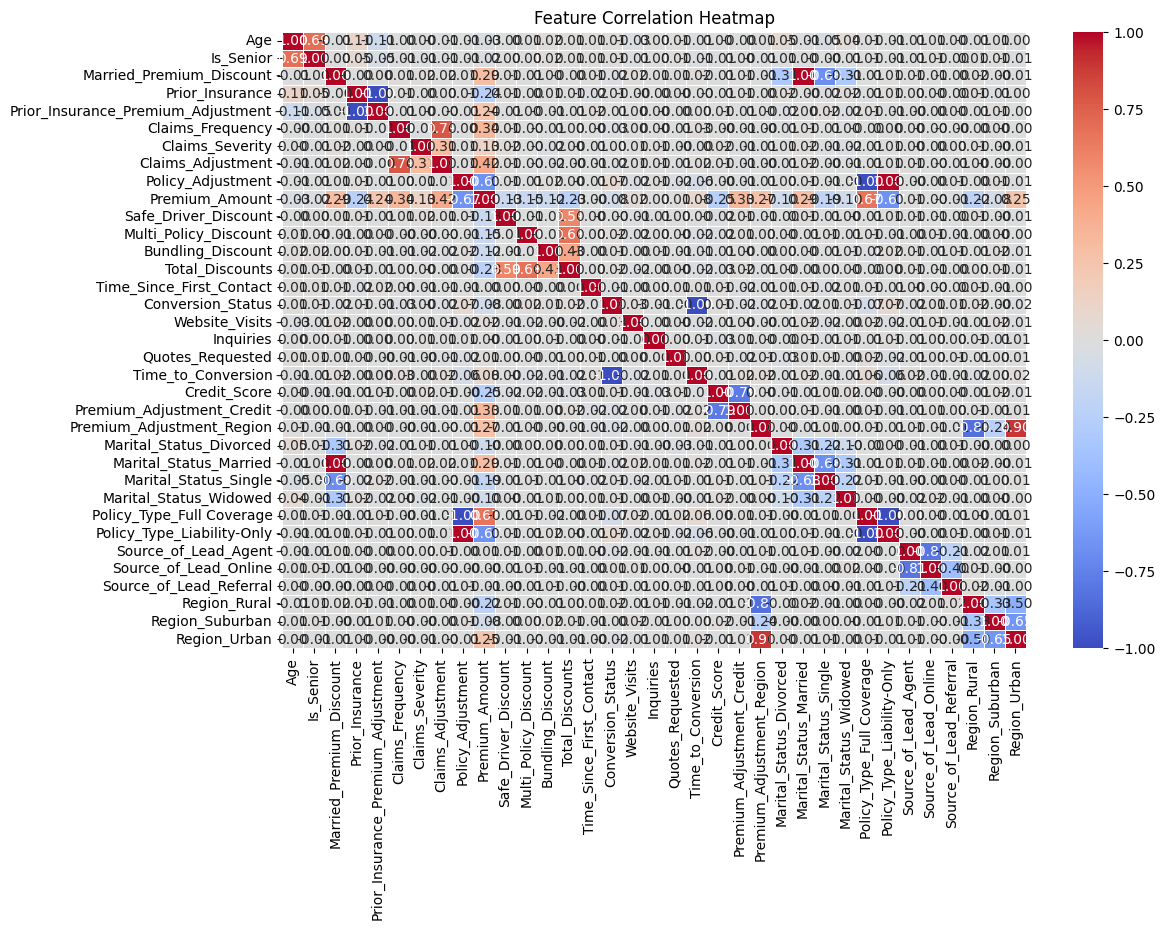

In [31]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
# Set correlation thresholds
high_corr_threshold = 0.75  # Features with correlation > 0.75 are highly correlated
low_corr_threshold = 0.05   # Features with correlation < 0.05 have weak relation to target

# Identify highly correlated features (excluding the target variable)
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_features.add(correlation_matrix.columns[i])

# Identify weakly correlated features with the target
if "Conversion_Status" in correlation_matrix.columns:
    target_corr = correlation_matrix["Conversion_Status"]
    low_corr_features = target_corr[abs(target_corr) < low_corr_threshold].index.tolist()
else:
    raise KeyError("Target variable 'conversion_status' not found in correlation matrix!")

# Combine features to remove
features_to_remove = list(high_corr_features) + low_corr_features
print("Features to remove:", features_to_remove)

# Drop the identified features from the dataset
df_selected = df_encoded.drop(columns=features_to_remove)

# Display remaining features
print("Remaining features:", df_selected.columns.tolist())


Features to remove: ['Policy_Type_Liability-Only', 'Region_Urban', 'Marital_Status_Married', 'Prior_Insurance_Premium_Adjustment', 'Premium_Adjustment_Credit', 'Policy_Type_Full Coverage', 'Source_of_Lead_Online', 'Claims_Adjustment', 'Time_to_Conversion', 'Region_Rural', 'Age', 'Is_Senior', 'Married_Premium_Discount', 'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment', 'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment', 'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount', 'Total_Discounts', 'Time_Since_First_Contact', 'Website_Visits', 'Inquiries', 'Quotes_Requested', 'Credit_Score', 'Premium_Adjustment_Credit', 'Premium_Adjustment_Region', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widowed', 'Source_of_Lead_Agent', 'Source_of_Lead_Online', 'Source_of_Lead_Referral', 'Region_Rural', 'Region_Suburban', 'Region_Urban']
Remaining features: ['Policy_Adjustment', 'Premium_Amount', 'Conversion_Status']


In [34]:
print(df_encoded[['Marital_Status_Married','Marital_Status_Single','Conversion_Status']].corr())


                        Marital_Status_Married  Marital_Status_Single  \
Marital_Status_Married                1.000000              -0.681406   
Marital_Status_Single                -0.681406               1.000000   
Conversion_Status                    -0.019536               0.007140   

                        Conversion_Status  
Marital_Status_Married          -0.019536  
Marital_Status_Single            0.007140  
Conversion_Status                1.000000  


In [35]:
correlation_with_target = df_encoded.corr()['Conversion_Status'].sort_values(ascending=False)
print(correlation_with_target)


Conversion_Status                     1.000000
Policy_Adjustment                     0.065393
Policy_Type_Liability-Only            0.065393
Website_Visits                        0.025315
Multi_Policy_Discount                 0.024390
Region_Rural                          0.023190
Total_Discounts                       0.020160
Source_of_Lead_Online                 0.014736
Is_Senior                             0.014002
Marital_Status_Divorced               0.011510
Credit_Score                          0.011398
Age                                   0.010889
Marital_Status_Widowed                0.010691
Bundling_Discount                     0.010554
Marital_Status_Single                 0.007140
Source_of_Lead_Referral               0.006037
Prior_Insurance                       0.005617
Claims_Severity                       0.004697
Region_Suburban                      -0.000601
Safe_Driver_Discount                 -0.001935
Quotes_Requested                     -0.004983
Prior_Insuran

In [36]:
scaler = StandardScaler()

# Select only numerical features to scale
features_to_scale = ['Premium_Amount', 'Website_Visits']

# Apply scaling
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [37]:
scaler = StandardScaler()
features_to_scale = ['Total_Discounts', 'Credit_Score', 'Age']

df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [38]:
# List of selected features
selected_features = [
    "Premium_Amount", "Policy_Type_Liability-Only", "Website_Visits",
    "Multi_Policy_Discount", "Region_Rural", "Total_Discounts",
    "Source_of_Lead_Online", "Is_Senior", "Credit_Score", "Age"
]

# Keep only selected features + target variable
df_selected = df_encoded[selected_features + ["Conversion_Status"]]

# Save the final dataset for model training
df_selected.to_csv("final_dataset_for_training.csv", index=False)